<a href="https://colab.research.google.com/github/legion911/7code_Task1/blob/main/Titanic_Classification(Task1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic Classification**

### **Objective** - To build a model capable of detecting whether a passenger was safe from the sinking of titanic

### Import Libraries

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [57]:
df = pd.read_csv(r'https://github.com/legion911/7code_Task1/raw/main/Titanic-Dataset.csv')

In [58]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **EDA**


*   **Passenger ID** - To identify unique passengers
*   **Survived** - If they survived or not (0 = Dead 1 = Alive)

*  **P Class** - The class passengers travelled in

* **Name** - Passenger Name

*  **Sex** - Gender of Passenger
*   **Age** - Age of passenger


*   **SibSp** - Number of siblings or spouse

*  **Parch** - Parent or child

*   **Ticket** - Ticket number
*   **Fare** - Amount paid for the ticket


*   **Cabin** - Cabin of residence




*   **Embarked** - Point of embarkment (C = Cherbourg; Q = Queenstown; S = Southampton)








In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [60]:
df.shape

(891, 12)

In [61]:
df.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [62]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# **Data Pre-processing**

### To find empty cells and duplicate entries

In [63]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [64]:
df.duplicated().sum()

0

### To fill missing values

In [65]:
df['Age'] = df['Age'].fillna(df['Age'].mean())


In [66]:
df[df['Pclass']==1].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S


## Label Encoding

For columns with different entries a technique that is used to convert categorical columns into numerical ones is used, so that they can be fitted by machine learning models which only take numerical data.
In this dataset we use label encoding on the columns - 'Sex' and 'Embarked'.

In [67]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex', 'Embarked']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])

In [68]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


# **Data Visualization**

In [69]:
import seaborn as sns

<ipython-input-70-3414db7f92e7>:1: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.displot(data=df, x='Age', hue='Survived', kind='kde', fill=True, palette=sns.color_palette('bright')[:3], height=5, aspect=1.5)


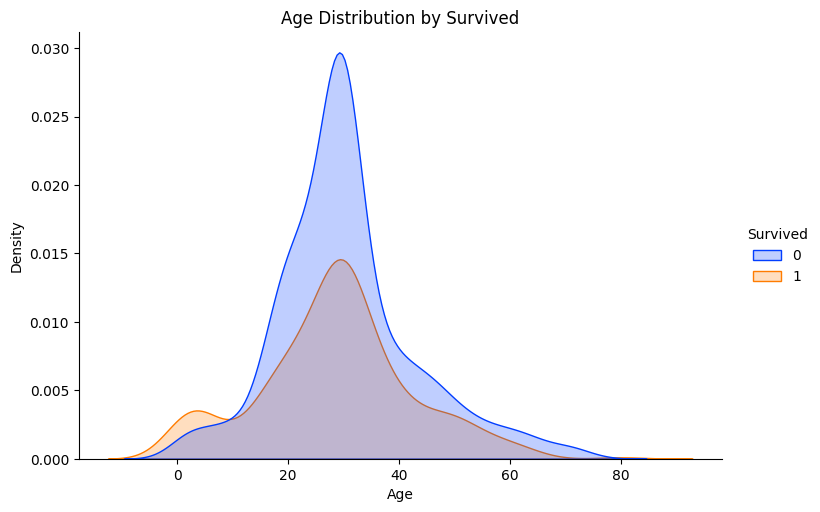

In [70]:
sns.displot(data=df, x='Age', hue='Survived', kind='kde', fill=True, palette=sns.color_palette('bright')[:3], height=5, aspect=1.5)
plt.title('Age Distribution by Survived')
plt.show()

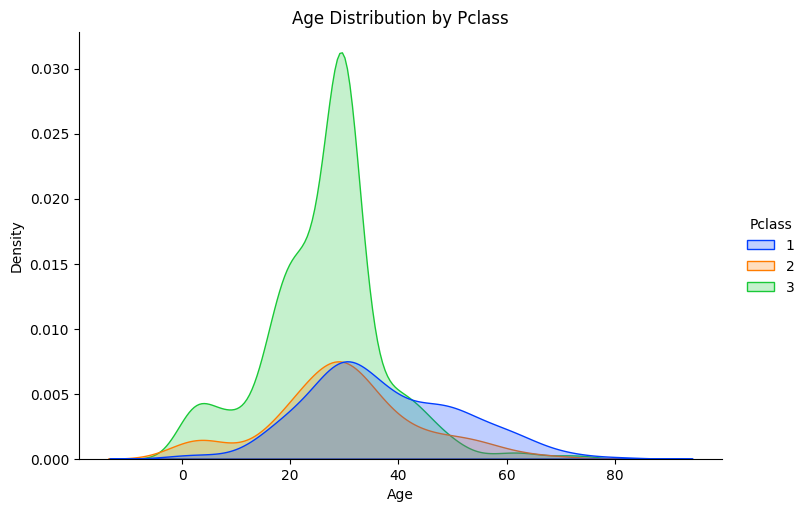

In [71]:
sns.displot(data=df, x='Age', hue='Pclass', kind='kde', fill=True, palette=sns.color_palette('bright')[:3], height=5, aspect=1.5)
plt.title('Age Distribution by Pclass')
plt.show()

In [72]:
df_corr = df.drop(['PassengerId'], axis = 1)

In [73]:
df = df.drop(columns=['Name', 'Ticket', 'Cabin'], axis=1)

### Correlation Heatmap

<ipython-input-74-d17fdee85bd1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_corr.corr(),annot = True, cmap = plt.cm.Reds)


Text(0.5, 1.0, 'Correlation Matrix')

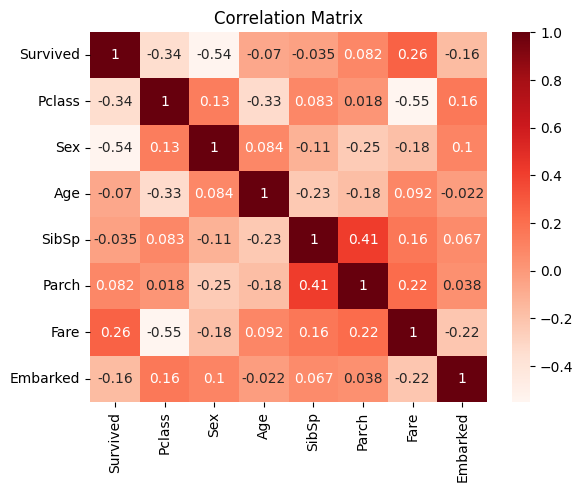

In [74]:
sns.heatmap(df_corr.corr(),annot = True, cmap = plt.cm.Reds)
plt.title('Correlation Matrix')

Text(0.5, 1.0, 'PairPlot')

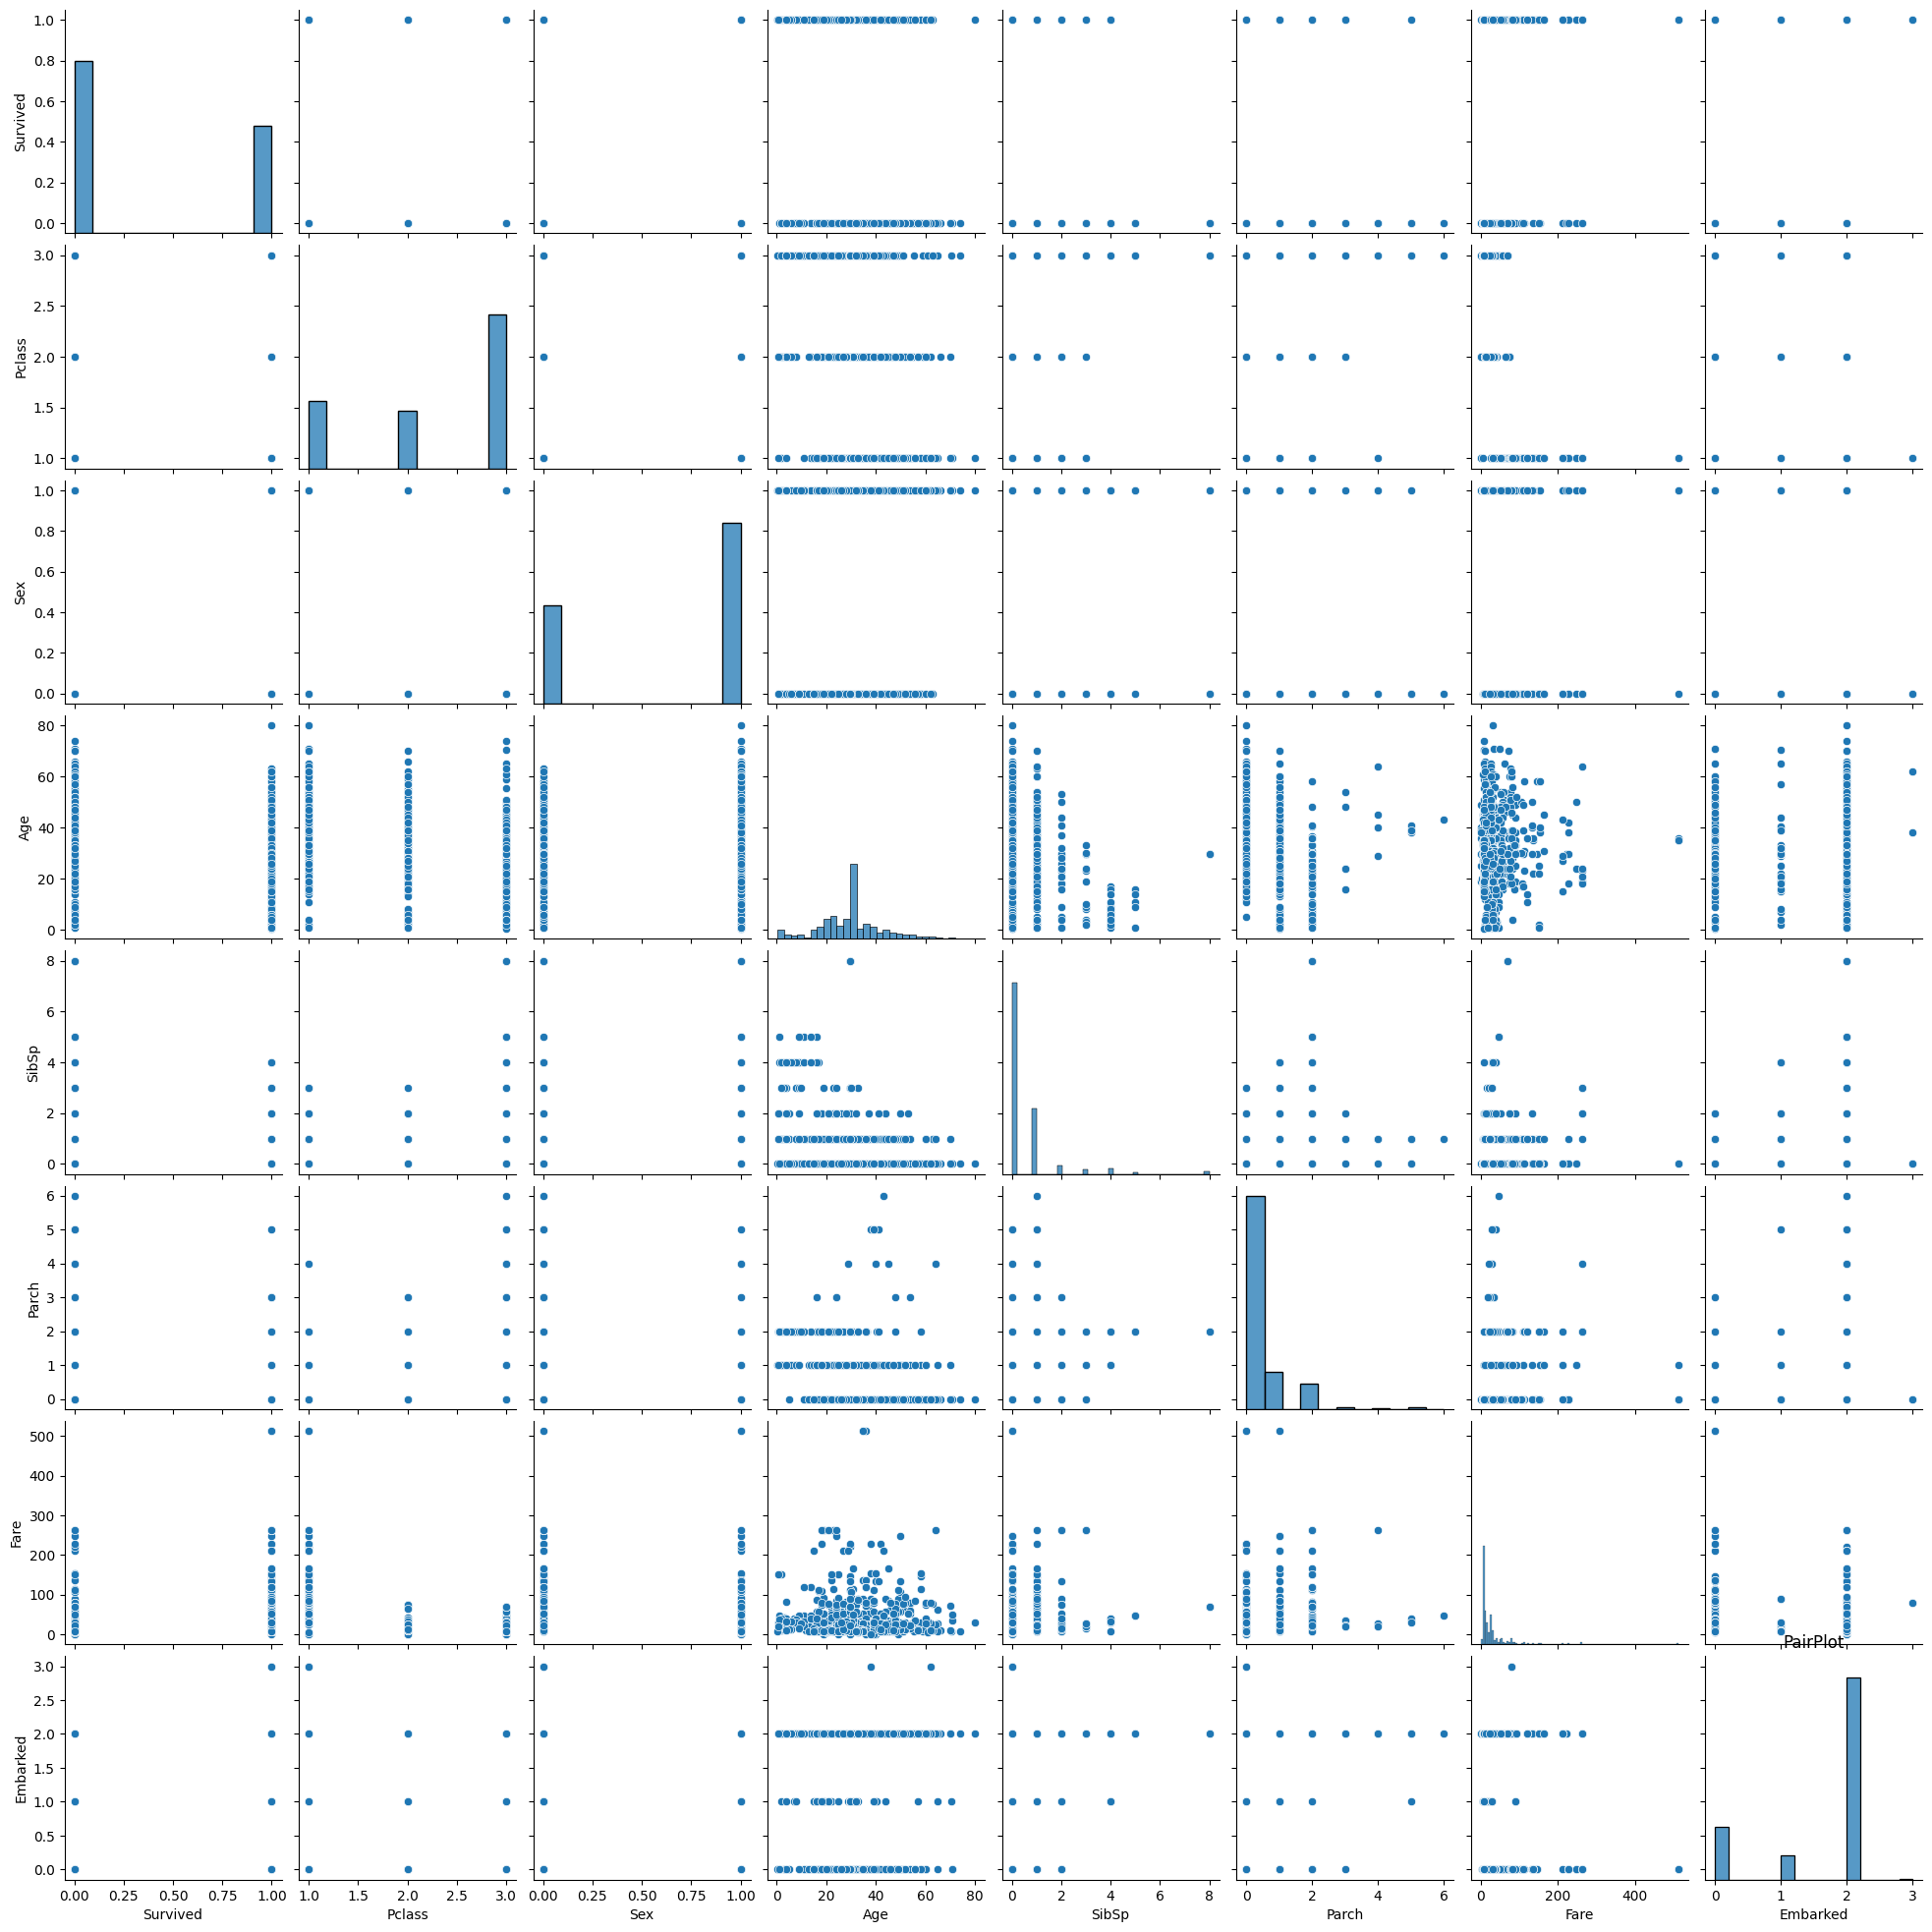

In [75]:
sns.pairplot(data=df_corr)
plt.title('PairPlot')

# Sample testing

### To take sample data for training and testing

In [76]:
train_data = df.sample(frac=0.7, random_state=25)
test_data = df.drop(train_data.index)

In [77]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
760,761,0,3,1,29.699118,0,0,14.5000,2
773,774,0,3,1,29.699118,0,0,7.2250,0
266,267,0,3,1,16.000000,4,1,39.6875,2
507,508,1,1,1,29.699118,0,0,26.5500,2
524,525,0,3,1,29.699118,0,0,7.2292,0


### To drop the unnecessary columns

In [78]:
X = train_data.drop(columns=['PassengerId', 'Survived'], axis=1)
y = train_data['Survived']

In [79]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
760,3,1,29.699118,0,0,14.5000,2
773,3,1,29.699118,0,0,7.2250,0
266,3,1,16.000000,4,1,39.6875,2
507,1,1,29.699118,0,0,26.5500,2
524,3,1,29.699118,0,0,7.2292,0


### **train_test_split on sample data**

Splitting of data is followed by preprocessing through MinMax Normalization

In [152]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train5, y_test5 = train_test_split(X, y, test_size=0.25, random_state=0)

In [153]:
MinMax = MinMaxScaler()
X_train = MinMax.fit_transform(X_train)
X_test = MinMax.transform(X_test)

In [154]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(random_state=42, solver="liblinear")
LogReg.fit(X_train, y_train5)

LogisticRegression(random_state=42, solver='liblinear')

### Confusion matrix

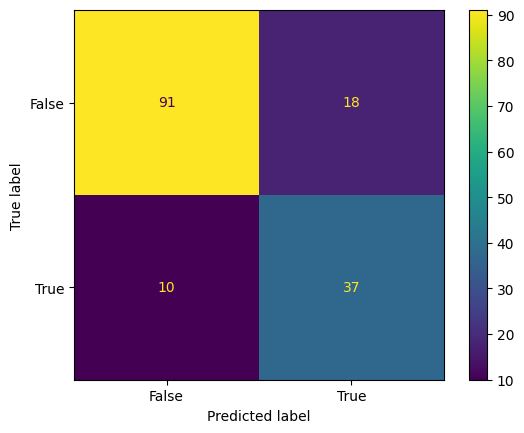

In [155]:
y_pred = LogReg.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test5, y_pred, labels=LogReg.classes_)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [156]:
print(classification_report(y_test5, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.83      0.87       109
           1       0.67      0.79      0.73        47

    accuracy                           0.82       156
   macro avg       0.79      0.81      0.80       156
weighted avg       0.83      0.82      0.82       156



# **Model Selection**

Computing accuracy and cross-validation scores of the model using various algorithms

In [136]:
from sklearn.model_selection import train_test_split, cross_val_score
def classify(model):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print('Accuracy:', model.score(x_test, y_test))

    score = cross_val_score(model, X, y, cv=5)
    print('CV Score:', np.mean(score))

In [137]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model)

Accuracy: 0.7756410256410257
CV Score: 0.7483225806451613


In [138]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model)

Accuracy: 0.8333333333333334
CV Score: 0.7965161290322581


In [139]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model)

Accuracy: 0.7756410256410257
CV Score: 0.7772516129032259


In [140]:
from xgboost import XGBClassifier
model = XGBClassifier()
classify(model)

Accuracy: 0.8012820512820513
CV Score: 0.7981290322580645


In [141]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(),max_samples=0.5, max_features=0.5)
classify(bagging)

Accuracy: 0.7307692307692307
CV Score: 0.7498709677419355


In [142]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
classify(model)

Accuracy: 0.7884615384615384
CV Score: 0.7916645161290322


# Conclusion

We can conclude that to classify the Titanic-dataset so as to determine whether a passenger survives or not can be done through many ML classification algorithms. RandomForestClassifier is the algorithm that gives the most accurate predictions.